# SVM(Support Vector Machine)
- 퍼포먼스가 떨어짐 => 근접거리끼리 그룹핑하여 계산  
- convergence(수렴)해야 hat(Y^)값을 쓸 수 있음
![](../Data/svm.png)

### SVM을 활용한 비만도(BMI) 측정 예측
- BMI = 몸무게(kg) / 키(m) * 키(m)
- BMI가 18.5이상 25미만 표준 몸무게 입니다.

In [2]:
# 데이터를 획득하기 위해 무작위로 2만명 데이터를 생성.
# 키(cm),몸무게(kg),Label(제체중(thin),정상체중(normal),비만(fat)의 csv 생성

import random

# BMI를 계산해서 Label을 return하는 함수
def calc_bmi(h,w):
    bmi = w / (h/100) **2
    if bmi <18.5: return "thin"
    if bmi <25: return "normal"
    return "fat"
# 저장 파일 준비하기
fp = open("../Data/bmi.csv",'w',encoding='utf-8')
fp.write("height,weight,label\r\n") # \r\n return newline => 

# 무작위로 데이터 생성하기
cnt = {"thin":0,"normal":0,"fat":0} # 각 분류마다 데이터 세기

for i in range(20000):
    h = random.randint(120,200)
    w = random.randint(35,80)
    label = calc_bmi(h,w)
    cnt[label] += 1 
    fp.write("{0},{1},{2}\r\n".format(h,w,label))
fp.close()
print("ok :",cnt)


ok : {'thin': 6328, 'normal': 6023, 'fat': 7649}


### BMI공식을 사용하지 않고 BMI 예측

In [3]:
import pandas as pd

In [4]:
# 데이터 불러오기
tbl = pd.read_csv("../Data/bmi.csv")
# tbl.head()

,height,weight,label
0,125,63,fat
1,200,57,thin
2,154,74,fat
3,154,72,fat
4,182,46,thin


In [5]:
# height와 weight의 표준편차가 차이나므로 정규화 필요함
tbl.describe()

,height,weight
count,20000.000000,20000.000000
mean,159.847050,57.457050
std,23.251155,13.223619
min,120.000000,35.000000
25%,140.000000,46.000000
50%,160.000000,57.000000
75%,180.000000,69.000000
max,200.000000,80.000000


In [6]:
# 컬럼을 분리하여 정규화 하기
label = tbl['label']

# 각 데이터를 해당 컬럼의 최대값을 나눔 
w = tbl['weight']/ 80
h = tbl['height']/ 200

In [11]:
bmi_nor = pd.concat([w,h,label],axis=1)
bmi_nor.head()

,weight,height,label
0,0.7875,0.625,fat
1,0.7125,1.000,thin
2,0.9250,0.770,fat
3,0.9000,0.770,fat
4,0.5750,0.910,thin


In [7]:
from sklearn.model_selection import train_test_split

In [20]:
# 학습용과 훈련용으로 나누기
train_data, test_data, train_label, test_label = train_test_split(bmi_nor.iloc[:,:2],bmi_nor.iloc[:,2])

In [21]:
from sklearn.svm import SVC

model = SVC()

In [22]:
# 데이터 학습하기
model.fit(train_data,train_label)

SVC()

In [23]:
# 정확도 구하기
model.score(test_data,test_label)

0.9932

In [25]:
# Confusion Matrix 출력하기
from sklearn import metrics

pred = model.predict(test_data)
metrics.confusion_matrix(test_label,pred)
print(metrics.classification_report(test_label,pred))

              precision    recall  f1-score   support

         fat       0.99      0.99      0.99      1885
      normal       0.99      0.99      0.99      1522
        thin       0.99      1.00      1.00      1593

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



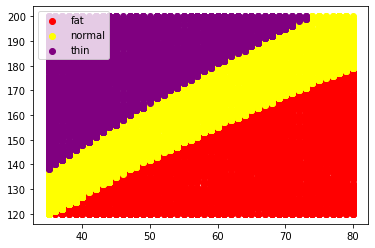

In [34]:
# 시각화 해보기 
import matplotlib.pyplot as plt
tbl = pd.read_csv("../Data/bmi.csv",index_col=2)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

def scatter(lbl,color):
    b = tbl.loc[lbl]
    ax.scatter(b['weight'],b['height'],c=color,label=lbl)

scatter("fat","red")
scatter("normal","yellow")
scatter("thin","purple")
ax.legend()
plt.savefig("../Data/bmi-test.png")
plt.show()


---
# SVM의 종류
-SVC(Classification)   
-NuSVC : "    
-LinearSVC : SVM중에서 가장 빠름, SVC대비 약 3배 정도 빠름(단, 예측력 떨어짐)      

In [41]:
import sklearn.svm as svm
clf = svm.LinearSVC()

In [42]:
# 데이터 학습하기
clf.fit(train_data,train_label)

LinearSVC()

In [43]:
# 정확도 구하기
clf.score(test_data,test_label)

0.916